In [2]:
# Import pandas under the alias pd
import pandas as pd


# Load the dataset into df_activities
df_activities = pd.read_csv('cardioActivities.csv', parse_dates=['Date'], index_col='Date')

# Display 3 random rows from df_activities
print(df_activities.sample(n=3))

# Print a summary of df_activities
print("\nDataset Summary:")
df_activities.info()

                                              Activity Id     Type Route Name  \
Date                                                                            
2018-06-06 18:44:29  e65e79d8-d30e-4ec1-b15e-aa7c63385dc9  Running        NaN   
2015-08-15 18:46:21  318bf8f5-6344-4f1e-8fb8-f52d7a38ebc1  Cycling        NaN   
2018-01-05 17:45:58  6344fc66-c0ec-47c5-bfae-c1d2b8d599c1  Running        NaN   

                     Distance (km) Duration Average Pace  \
Date                                                       
2018-06-06 18:44:29          12.78  1:07:56         5:19   
2015-08-15 18:46:21          13.72    38:39         2:49   
2018-01-05 17:45:58          11.40  1:06:31         5:50   

                     Average Speed (km/h)  Calories Burned  Climb (m)  \
Date                                                                    
2018-06-06 18:44:29                 11.29            901.0        170   
2015-08-15 18:46:21                 21.30            313.0        139   
2

In [4]:


# Task 2: Data preprocessing tasks

# Delete unnecessary columns
cols_to_drop = ['Friends Tagged', 'Route Name', 'GPX File', 'Activity Id']
df_activities = df_activities.drop(columns=cols_to_drop)

# Calculate activity type counts
activity_counts = df_activities['Type'].value_counts()
print("\nActivity Type Counts:")
print(activity_counts)

# Rename 'Other' to 'Unicycling' in the Type column
df_activities['Type'] = df_activities['Type'].str.replace('Other', 'Unicycling')

# Count missing values in each column
missing_values = df_activities.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Activity Type Counts:
Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64

Missing Values in Each Column:
Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
Notes                       277
dtype: int64


In [5]:
# Calculate the sample mean for Average Heart Rate (bpm) for 'Cycling'
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

# Filter df_activities for 'Cycling' and create a copy
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

# Fill in missing values for Average Heart Rate (bpm) in df_cycle
df_cycle['Average Heart Rate (bpm)'] = df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle))

# Count missing values for all columns in df_cycle
missing_values_cycle = df_cycle.isnull().sum()
print("Missing Values in Each Column for Cycling:")
print(missing_values_cycle)

Missing Values in Each Column for Cycling:
Type                         0
Distance (km)                0
Duration                     0
Average Pace                 0
Average Speed (km/h)         0
Calories Burned              0
Climb (m)                    0
Average Heart Rate (bpm)     0
Notes                       21
dtype: int64


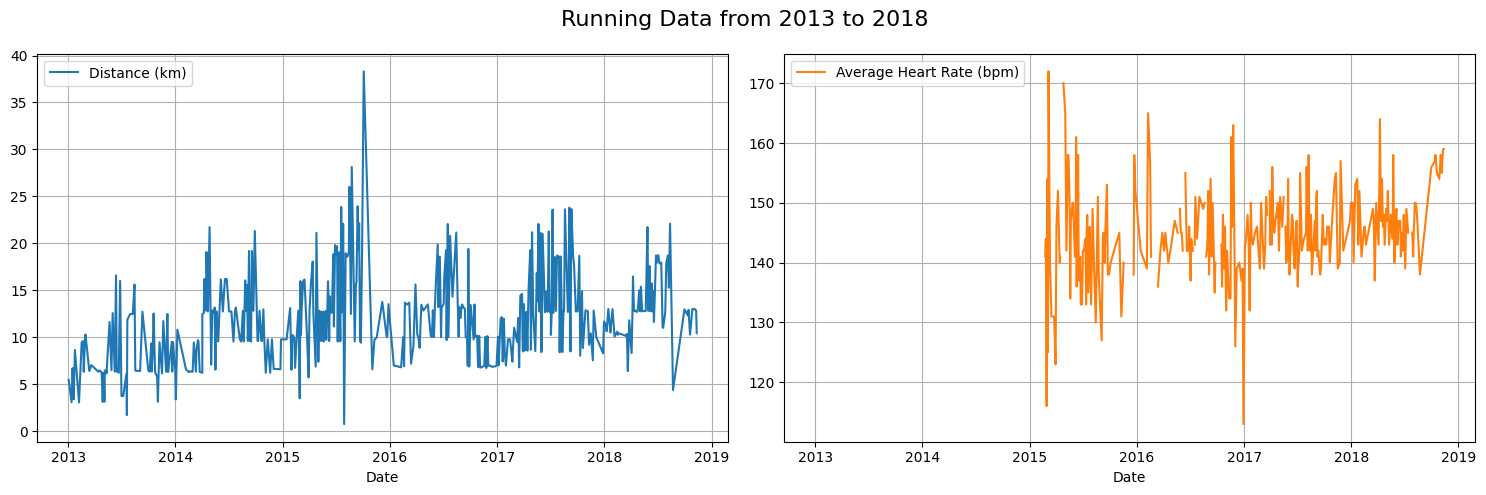

In [14]:
import matplotlib.pyplot as plt

# Subset df_run for data from 2013 through 2018
df_run = df_activities[df_activities['Type'] == 'Running']
runs_subset_2013_2018 = df_run[(df_run.index.year >= 2013) & (df_run.index.year <= 2018)]

# Sort the index to ensure it's in chronological order
runs_subset_2013_2018 = runs_subset_2013_2018.sort_index()

# Create the plot with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True)
runs_subset_2013_2018.plot(y=['Distance (km)', 'Average Heart Rate (bpm)'], 
                           subplots=True, ax=axes)

# Customize the plot
fig.suptitle('Running Data from 2013 to 2018', fontsize=16)
for ax in axes:
    ax.set_xlabel('Date')
    ax.legend(loc='upper left')
    ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
import numpy as np

# Convert index to datetime if it's not already
df_run.index = pd.to_datetime(df_run.index)

# Sort the index
df_run = df_run.sort_index()

# Subset df_run for data from 2015 through 2018
runs_subset_2015_2018 = df_run.loc[df_run.index.year.isin([2015, 2016, 2017, 2018])]

# Function to convert time string to seconds
def time_to_seconds(time_str):
    parts = time_str.split(':')
    if len(parts) == 3:
        return int(parts[0]) * 3600 + int(parts[1]) * 60 + int(parts[2])
    elif len(parts) == 2:
        return int(parts[0]) * 60 + int(parts[1])
    else:
        return np.nan

# Convert time-based columns to seconds
time_columns = ['Average Speed (km/h)', 'Average Heart Rate (bpm)']
for col in time_columns:
    if runs_subset_2015_2018[col].dtype == 'object':
        runs_subset_2015_2018[col] = runs_subset_2015_2018[col].apply(time_to_seconds)

# Ensure all columns are numeric
numeric_columns = ['Distance (km)', 'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)']
for col in numeric_columns:
    runs_subset_2015_2018[col] = pd.to_numeric(runs_subset_2015_2018[col], errors='coerce')

# Calculate annual averages
annual_averages = runs_subset_2015_2018.groupby(runs_subset_2015_2018.index.year)[numeric_columns].mean()

# Calculate weekly averages
weekly_averages = runs_subset_2015_2018[numeric_columns].resample('W').mean()

# Calculate average of weekly averages
avg_weekly_averages = weekly_averages.mean()

# Calculate average number of trainings per week
weekly_counts = runs_subset_2015_2018['Distance (km)'].resample('W').count()
weekly_counts_average = weekly_counts.mean()

# Print results
print("Annual Averages:")
print(annual_averages)

print("\nAverage of Weekly Averages:")
print(avg_weekly_averages)

print(f"\nAverage number of trainings per week: {weekly_counts_average:.2f}")

Annual Averages:
      Distance (km)  Average Speed (km/h)   Climb (m)  \
Date                                                    
2015      13.602805             10.998902  160.170732   
2016      11.411667             10.837778  133.194444   
2017      12.935176             10.959059  169.376471   
2018      13.339063             10.777969  191.218750   

      Average Heart Rate (bpm)  
Date                            
2015                143.231884  
2016                143.301587  
2017                145.277108  
2018                148.258065  

Average of Weekly Averages:
Distance (km)                12.518176
Average Speed (km/h)         10.835473
Climb (m)                   158.325444
Average Heart Rate (bpm)    144.925000
dtype: float64

Average number of trainings per week: 1.50


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10376\401881336.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_subset_2015_2018[col] = pd.to_numeric(runs_subset_2015_2018[col], errors='coerce')


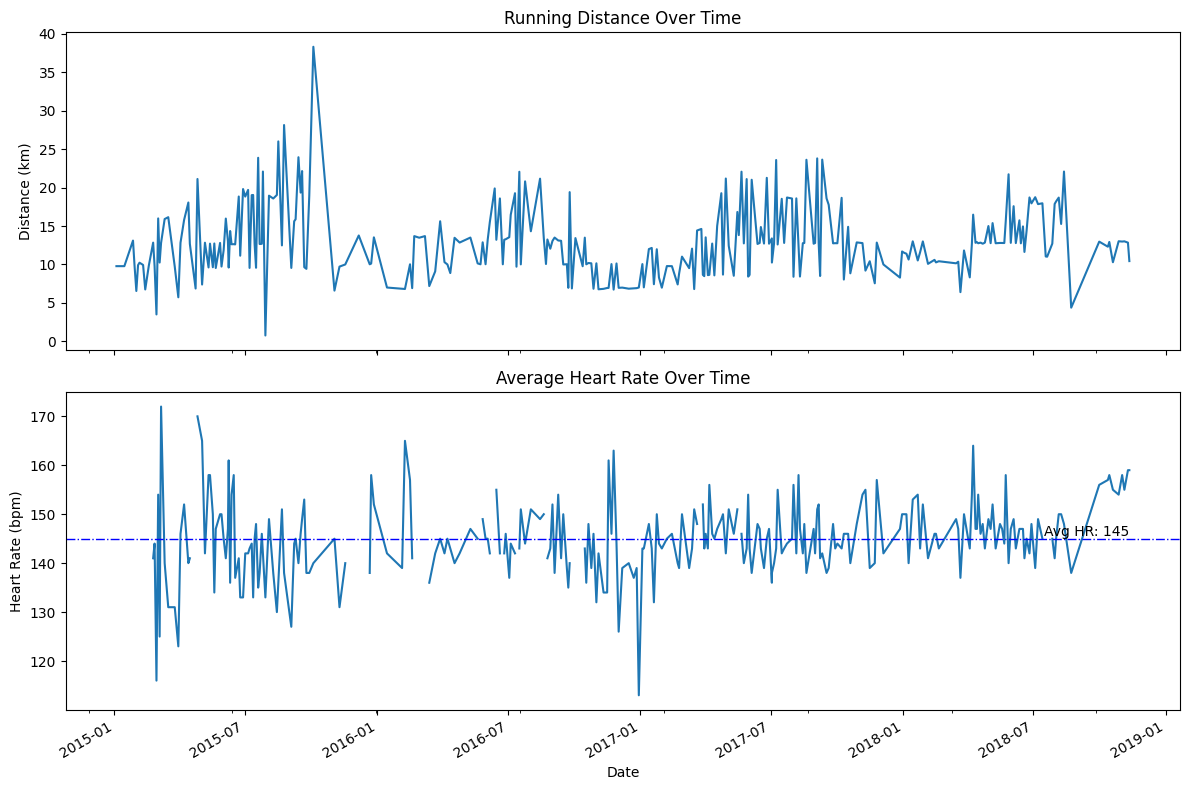

In [18]:
import matplotlib.pyplot as plt

# Select information for distance and heart rate
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# Create two subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

# Plot distance on the first subplot
runs_distance.plot(ax=ax1)
ax1.set_ylabel('Distance (km)')
ax1.set_title('Running Distance Over Time')

# Plot heart rate on the second subplot
runs_hr.plot(ax=ax2)
ax2.set_ylabel('Heart Rate (bpm)')
ax2.set_title('Average Heart Rate Over Time')

# Add horizontal line for average heart rate
avg_hr = runs_hr.mean()
ax2.axhline(avg_hr, color='blue', linewidth=1, linestyle='-.')
ax2.text(runs_hr.index[-1], avg_hr, f'Avg HR: {avg_hr:.0f}', 
         verticalalignment='bottom', horizontalalignment='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

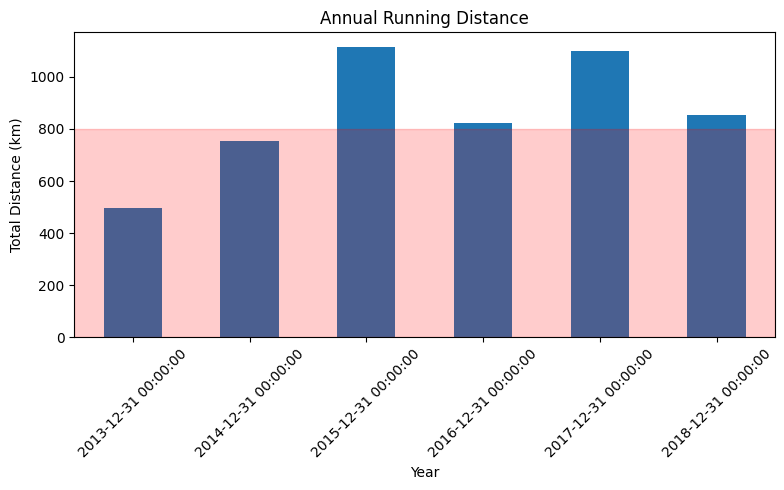

In [19]:
import matplotlib.pyplot as plt

# Subset df_run for data from 2013 through 2018 and select the Distance (km) column
df_run_subset = df_run.loc['2013':'2018', 'Distance (km)']

# Count annual totals
df_run_dist_annual = df_run_subset.resample('Y').sum()

# Create a plot
plt.figure(figsize=(8.0, 5.0))

# Plot the annual distance totals
ax = df_run_dist_annual.plot(kind='bar')

# Customize the plot with horizontal span from 0 to 800 km
ax.axhspan(0, 800, color='red', alpha=0.2)

# Customize the plot
plt.title('Annual Running Distance')
plt.xlabel('Year')
plt.ylabel('Total Distance (km)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

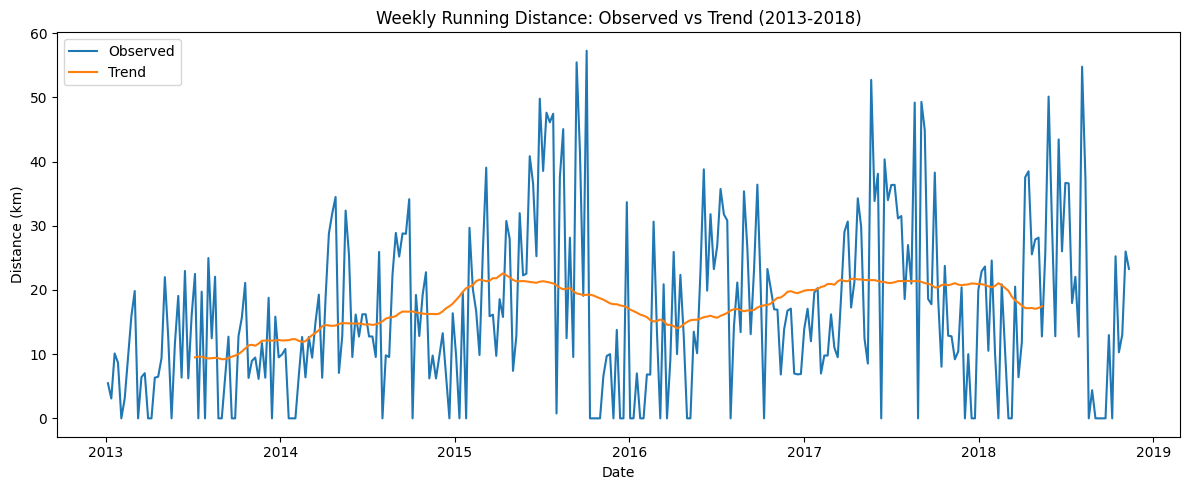

In [20]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Subset df_run from 2013 through 2018, select Distance (km) column, resample weekly, and fill NaN values
df_run_dist_wkly = df_run.loc['2013':'2018', 'Distance (km)'].resample('W').sum().bfill()

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(df_run_dist_wkly, model='additive', period=52)

# Create a plot
plt.figure(figsize=(12, 5))

# Plot observed data
plt.plot(df_run_dist_wkly.index, df_run_dist_wkly.values, label='Observed')

# Plot trend
plt.plot(df_run_dist_wkly.index, decomposition.trend, label='Trend')

# Customize the plot
plt.title('Weekly Running Distance: Observed vs Trend (2013-2018)')
plt.xlabel('Date')
plt.ylabel('Distance (km)')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

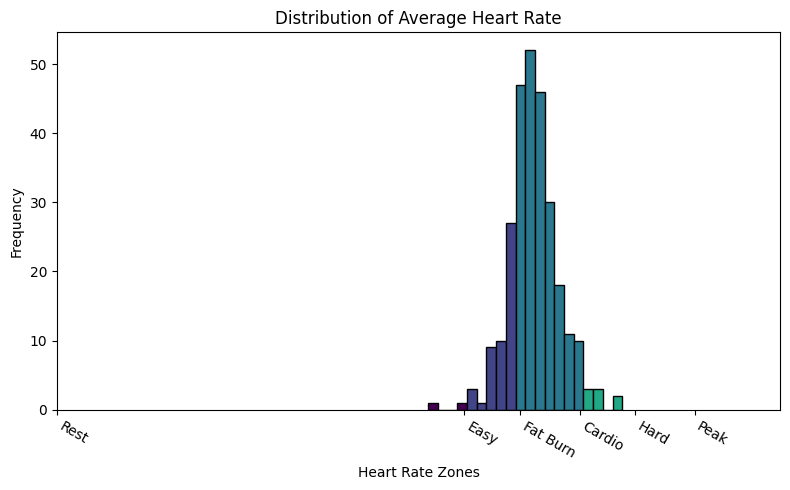

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Subset df_run from March 2015 through 2018 and select the Average Heart Rate (bpm) column
df_run_hr_all = df_run.loc['2015-03':'2018', 'Average Heart Rate (bpm)']

# Create a plot
fig, ax = plt.subplots(figsize=(8, 5))

# Create the histogram
n, bins, patches = ax.hist(df_run_hr_all, bins=20, edgecolor='black')

# Define heart rate zones and their names
zone_edges = [0, 124, 141, 159, 176, 194, 220]
zone_names = ['Rest', 'Easy', 'Fat Burn', 'Cardio', 'Hard', 'Peak']

# Set x-axis limits
ax.set_xlim(zone_edges[0], zone_edges[-1])

# Set custom x-axis ticks and labels
ax.set_xticks(zone_edges[:-1])
ax.set_xticklabels(zone_names, rotation=-30, ha='left')

# Color the histogram bars based on heart rate zones
for i, patch in enumerate(patches):
    bin_center = bins[i] + (bins[i+1] - bins[i])/2
    for j, edge in enumerate(zone_edges[1:-1]):
        if bin_center < edge:
            patch.set_facecolor(plt.cm.viridis(j/5))
            break
    else:
        patch.set_facecolor(plt.cm.viridis(1))

# Customize the plot
plt.title('Distribution of Average Heart Rate')
plt.xlabel('Heart Rate Zones')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()